In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams

In [2]:
rcParams.update({'legend.fontsize': 'x-large',
                 'figure.figsize': (12, 6),
                 'axes.labelsize': 'x-large',
                 'axes.titlesize':'x-large',
                 'xtick.labelsize':'x-large',
                 'ytick.labelsize':'x-large'})

# P1 - Minimum Mean Square Error Estimator

Assume the variance of the noise to be $\sigma_\nu^2=1$.

In [3]:
sigma_nu = np.sqrt(1)
sigma_nu

1.0

## a)
Generate a BPSK-symbol $\theta\in\{-1,+1\}$ and add zero-mean Gaussian noise of variance $\sigma_\nu^2$ to it.
The two BSPK-symbols should be of equal probability.

Hint: Check [`numpy.random.choice`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html).

In [4]:
theta = np.random.choice([-1, 1])
theta

1

In [5]:
nu = np.random.normal(0.0, sigma_nu)
x = theta + nu
x

2.4348287571388387

## b)
Display the pdfs $p_{x|\theta}(x|\theta)$, $p_{x}(x)$, $p_{\theta|x}(\theta|x)$ derived in the first tasks of the theoretical exercise.
Further, display the conditional bit error probability $\text{Pr}_{\text{error}|x}(\text{error}|x)$.
Examine the influence of different variances of the noise (e.g. $\sigma_\nu^2\in\{1,0.5,0.1\}$).

Hint: Check [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and [`numpy.minimum`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.minimum.html).

In [6]:
def p_x_given_theta(x, theta, sigma_nu):
    return stats.norm.pdf(x, loc=theta, scale=sigma_nu) 

def p_x(x, sigma_nu):
    return 0.5*stats.norm.pdf(x,loc=-1,scale=sigma_nu) + 0.5*stats.norm.pdf(x,loc=1,scale=sigma_nu)

def p_theta_given_x(theta, x, sigma_nu):
    a = np.exp(-x / sigma_nu**2)
    b = np.exp(x / sigma_nu**2)
    if theta == -1:
        return a / (a+b)
    elif theta == 1:
        return b / (a+b)
    else:
        raise ValueError
        
def p_error_given_x(x, sigma_nu):
    return np.minimum(
        p_theta_given_x(-1, x, sigma_nu),
        p_theta_given_x(1, x, sigma_nu)
    )

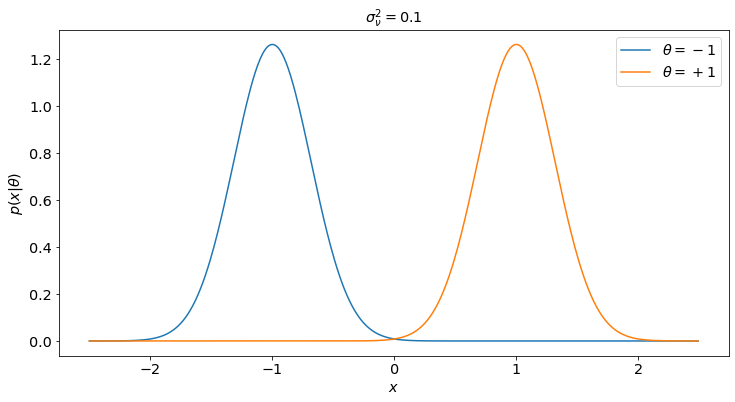

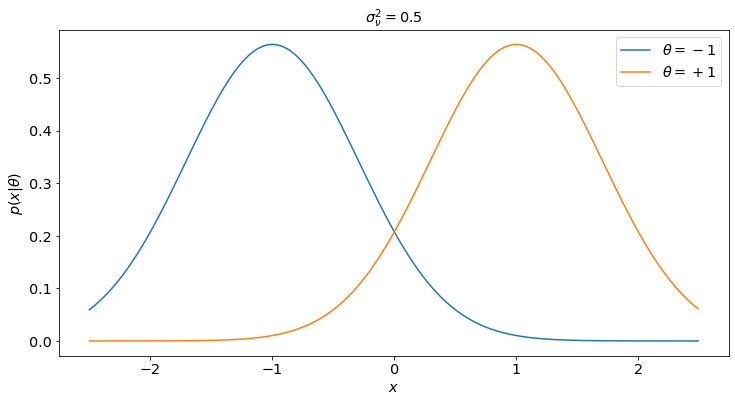

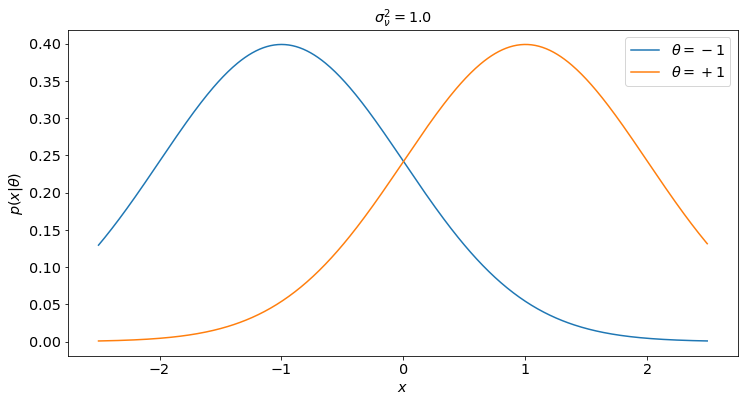

In [15]:
x = np.arange(-2.5, 2.5, 0.01)
for sigma in [np.sqrt(.1), np.sqrt(.5), np.sqrt(1.)]:
    plt.plot(x, p_x_given_theta(x, -1, sigma))
    plt.plot(x, p_x_given_theta(x, 1, sigma))
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x | \theta)$')
    plt.title(r'$\sigma_\nu^2={}$'.format(np.round(sigma**2, 2)))
    plt.legend([r'$\theta = -1$', r'$\theta = +1$'], loc='upper right')
    plt.show()

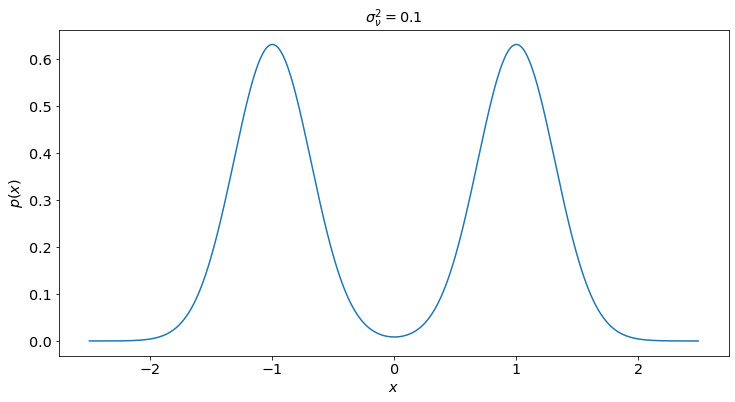

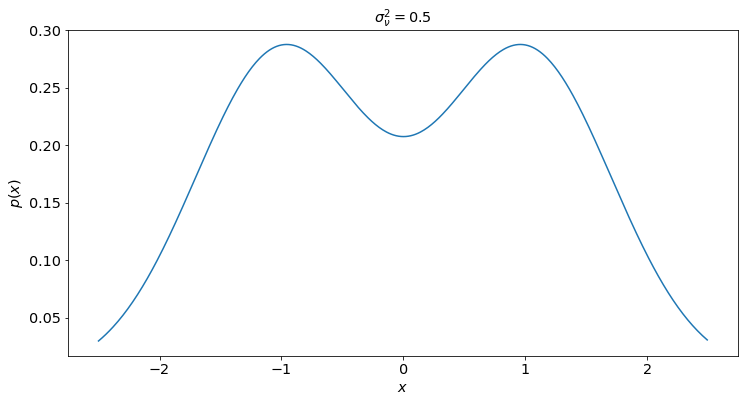

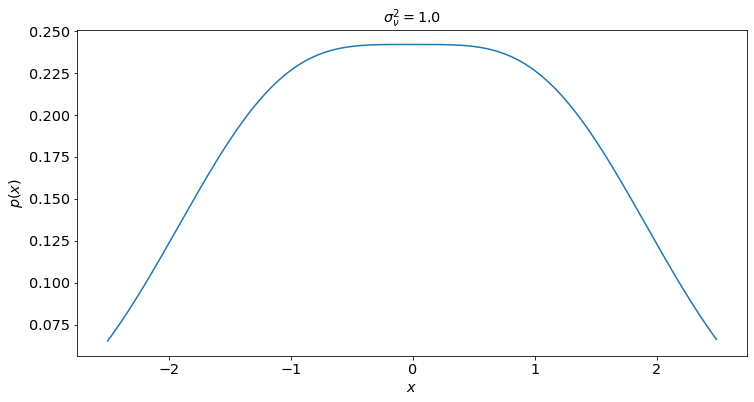

In [8]:
x = np.arange(-2.5, 2.5, 0.01)
for sigma in [np.sqrt(.1), np.sqrt(.5), np.sqrt(1.)]:
    plt.plot(x, p_x(x, sigma))
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.title(r'$\sigma_\nu^2={}$'.format(np.round(sigma**2, 2)))
    plt.show()

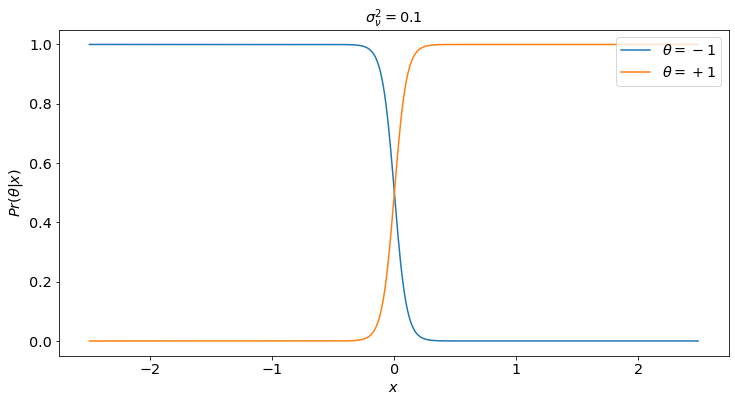

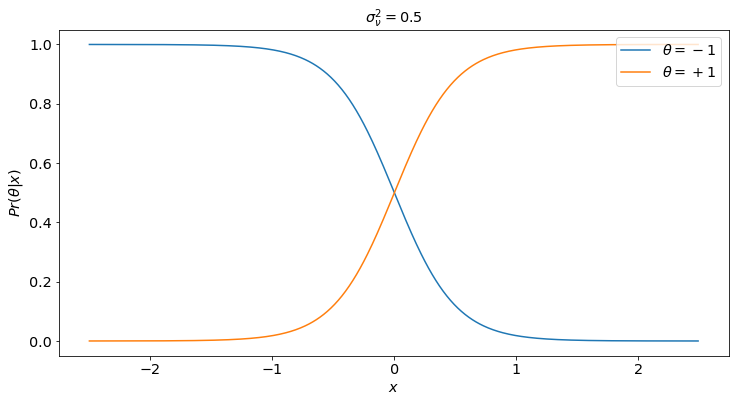

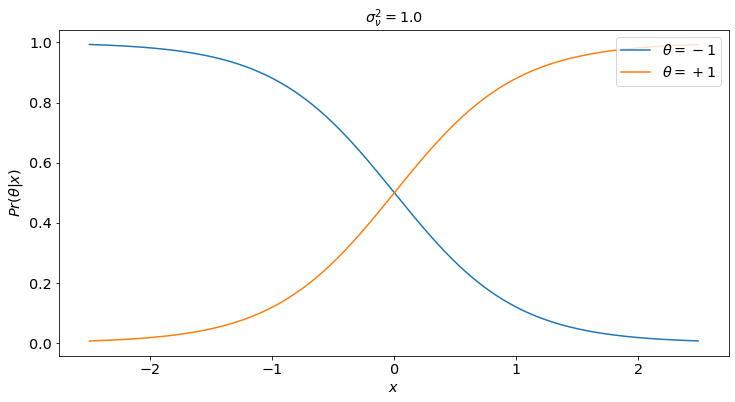

In [9]:
x = np.arange(-2.5, 2.5, 0.01)
for sigma in [np.sqrt(.1), np.sqrt(.5), np.sqrt(1.)]:
    plt.plot(x, p_theta_given_x(-1, x, sigma))
    plt.plot(x, p_theta_given_x(1, x, sigma))
    plt.xlabel('$x$')
    plt.ylabel(r'$Pr(\theta| x)$')
    plt.legend([r'$\theta = -1$', r'$\theta = +1$'], loc='upper right')
    plt.title(r'$\sigma_\nu^2={}$'.format(np.round(sigma**2, 2)))
    plt.show()

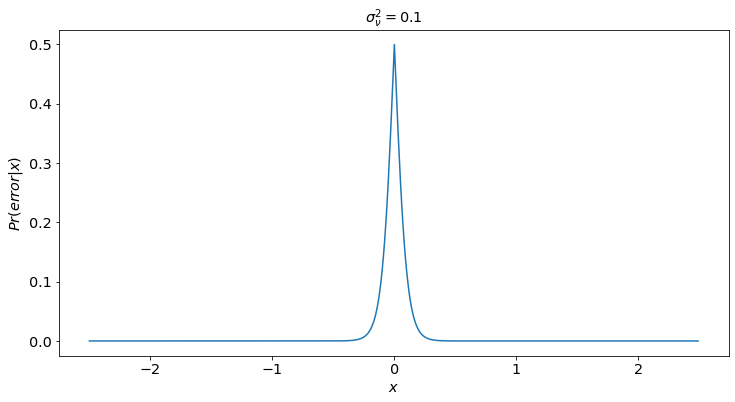

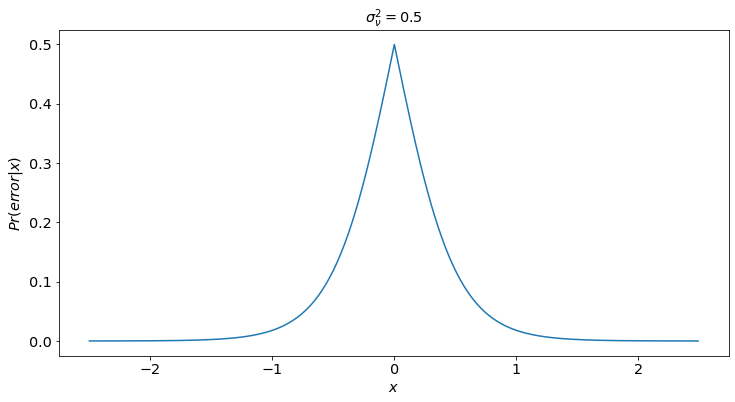

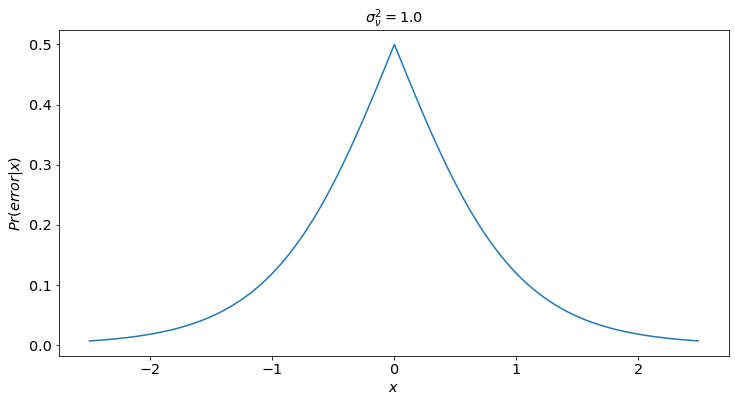

In [10]:
x = np.arange(-2.5, 2.5, 0.01)
for sigma in [np.sqrt(.1), np.sqrt(.5), np.sqrt(1.)]:
    plt.plot(x, p_error_given_x(x, sigma))
    plt.xlabel('$x$')
    plt.ylabel('$Pr(error | x)$')
    plt.title(r'$\sigma_\nu^2={}$'.format(np.round(sigma**2, 2)))
    plt.show()

## c) and d)
Given the statistical independence, the $N$-dimensional covariance matrix follows to be $\Sigma_{\nu,N}=\sigma_\nu^2 I_N = I_N$.
Implement the MMSE-estimator derived in the last task of the theoretical exercise.

Compare the MMSE-estimator with the suboptimal estimator
\begin{eqnarray*}
\hat{\theta}^{(\text{AVG})}(\mathbf x)= \frac{1}{N}\sum\limits_{n=1}^N x_n.
\end{eqnarray*}
What happens with an increasing number of observations  $N$ ($N \in \{1,..,200 \}$)? 
Does the averaged estimate $\hat{\theta}^{(\text{AVG})}(\mathbf x)$ (linear) take more samples to provide a good result compared with the optimal estimate
$\hat{\theta}^{(\text{MMSE})}(\mathbf x)$ (non-linear)?

In [11]:
def mmse_estimator(x, sigma_nu):
    return np.tanh(np.sum(x) / sigma_nu ** 2)    #this is the result of MMSE E[theta|x] 

def avg_estimator(x):
    return np.mean(x)                            #this is just the Expected value

<ipython-input-12-afb7ca287704>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  range_N = np.arange(1, 200, dtype=np.int)


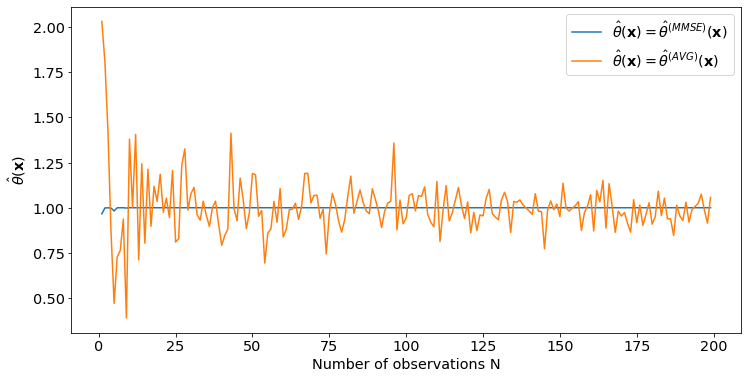

In [12]:
range_N = np.arange(1, 200, dtype=np.int)
mmse_estimate = np.zeros(shape=range_N.shape)
avg_estimate = np.zeros(shape=range_N.shape)
for index, n in enumerate(range_N):
    nu = np.random.normal(0.0, sigma_nu, size=(n,))
    x = theta + nu
    mmse_estimate[index] = mmse_estimator(x, sigma_nu)
    avg_estimate[index] = avg_estimator(x)
    
plt.plot(range_N, mmse_estimate)
plt.plot(range_N, avg_estimate)
plt.xlabel('Number of observations N')
plt.ylabel(r'$\hat{\theta}(\mathbf{x})$')
plt.legend([r'$\hat{\theta}(\mathbf{x})=\hat{\theta}^{(MMSE)}(\mathbf{x})$', r'$\hat{\theta}(\mathbf{x})=\hat{\theta}^{(AVG)}(\mathbf{x})$'], loc='upper right')
plt.show()

## e)
Examine the error variance of the two estimators $\hat{\theta}^{(\text{MMSE})}(\mathbf x)$ and $\hat{\theta}^{(\text{AVG})}(\mathbf x)$ and a third one given by
\begin{eqnarray*}
  \hat{\theta}_{\text{sgn}}^{(\text{MMSE})}(\mathbf x)= \text{sgn}\left(\hat{\theta}^{(\text{MMSE})}(\mathbf x)\right).
\end{eqnarray*}
Proceed as follows: Fix the number of observations at $N=10$ and perform $10000$ experiments. 
Compute the mean squared error for all three estimators.
Which results do you expect?

In [13]:
#initialization
mse_mmse = 0.
mse_avg = 0.
mse_sgn_mmse = 0.
trials = 10000
N = 10
for _ in range(trials):
    theta = np.random.choice([-1,1])
    nu = np.random.normal(0.0, sigma_nu, size=(N,))
    x = theta + nu
    mse_mmse += (mmse_estimator(x, sigma_nu) - theta) **2
    mse_avg += (avg_estimator(x) - theta) ** 2
    mse_sgn_mmse += (np.sign(mmse_estimator(x,sigma_nu))-theta) ** 2
mse_mmse /=trials
mse_avg /=trials
mse_sgn_mmse /=trials

print('MSE of MMSE estimator: {}'.format(mse_mmse))
print('MSE of AVG estimator: {}'.format(mse_avg))
print('MSE of SGN-MMSE estimator: {}'.format(mse_sgn_mmse))

MSE of MMSE estimator: 0.0035953723726964127
MSE of AVG estimator: 0.10255181577466822
MSE of SGN-MMSE estimator: 0.0048
